In [224]:
import matplotlib.pyplot as plt
import numpy as np
from itertools import combinations
import json

In [279]:
#dataset = 'ssc.hg38'
#subtypes = ['current', 'life']

dataset = 'spark.cytoband'
subtypes = [None]

In [280]:
intervals = np.load('../permutation_tests/phen.%s.intervals.npy' % dataset)
chroms = np.load('../permutation_tests/phen.%s.chroms.npy' % dataset)
print(intervals.shape, chroms.shape)

(2, 811) (811,)


In [281]:
print(chroms)
print(intervals.shape)

['1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1'
 '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1'
 '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1'
 '1' '1' '1' '1' '1' '1' '1' '1' '1' '2' '2' '2' '2' '2' '2' '2' '2' '2'
 '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2'
 '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2'
 '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '3'
 '3' '3' '3' '3' '3' '3' '3' '3' '3' '3' '3' '3' '3' '3' '3' '3' '3' '3'
 '3' '3' '3' '3' '3' '3' '3' '3' '3' '3' '3' '3' '3' '3' '3' '3' '3' '3'
 '3' '3' '3' '3' '3' '3' '3' '3' '3' '3' '3' '3' '3' '3' '3' '3' '3' '3'
 '3' '3' '3' '3' '3' '3' '3' '4' '4' '4' '4' '4' '4' '4' '4' '4' '4' '4'
 '4' '4' '4' '4' '4' '4' '4' '4' '4' '4' '4' '4' '4' '4' '4' '4' '4' '4'
 '4' '4' '4' '4' '4' '4' '4' '4' '4' '4' '4' '4' '4' '4' '4' '4' '4' '4'
 '5' '5' '5' '5' '5' '5' '5' '5' '5' '5' '5' '5' '5

(array([408., 204., 106.,  54.,  27.,   8.,   1.,   1.,   1.,   1.]),
 array([0.        , 0.30366903, 0.60733806, 0.91100709, 1.21467612,
        1.51834515, 1.82201418, 2.12568322, 2.42935225, 2.73302128,
        3.03669031]),
 <a list of 10 Patch objects>)

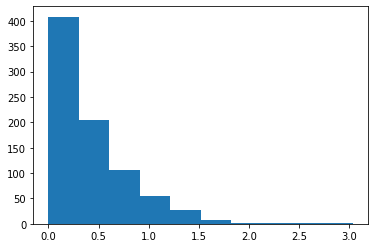

In [284]:
plt.hist(-np.log10(np.load('../permutation_tests/binombaseline.spark.cytoband.npy')))


In [286]:
chrom_lengths38 = {
	'1': 248956422,
	'2': 242193529,
	'3': 198295559,
	'4': 190214555,
	'5': 181538259,
	'6': 170805979,
	'7': 159345973,
	'8': 145138636,
	'9': 138394717,
	'10': 133797422,
	'11': 135086622,
	'12': 133275309,
	'13': 114364328,
	'14': 107043718,
	'15': 101991189,
	'16': 90338345,
	'17': 83257441,
	'18': 80373285,
	'19': 58617616,
	'20': 64444167,
	'21': 46709983,
	'22': 50818468,
	'X': 156040895,
#	'Y': 57227415
}

chrom_to_offset = dict()
offset = 0
for chrom in range(1, 23):
    chrom_to_offset[str(chrom)] = offset
    offset += chrom_lengths38[str(chrom)]
    
x = intervals[0, :] + np.array([chrom_to_offset[x] for x in chroms])

In [291]:
pvalues = np.ones((40, intervals.shape[1], len(subtypes)))
for j, subtype in enumerate(subtypes):
    for i in range(40):
        filename = '../permutation_tests/scq%d.%s%s.npy' % (i+1, dataset, '' if subtype is None else '.'+subtype)
        try:
            pvalues[i, :, j] = np.load('../permutation_tests/scq%d.%s%s.npy' % (i+1, dataset, '' if subtype is None else '.'+subtype))
        except:
            print(filename, 'not found')
print(pvalues.shape)



(40, 811, 1)


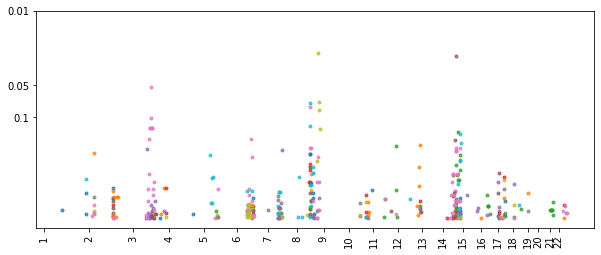

In [295]:
fig, subplots = plt.subplots(1, 1, figsize=(10, 4), sharey=True, sharex=True)

for i in range(40):
    indices = (pvalues[i, :, 0]<0.9)
    subplots.scatter(x[indices], np.clip(-np.log10(pvalues[i, indices, 0]), 0, 3), marker='.', alpha=0.75)
        
    
plt.xticks([chrom_to_offset[str(x)] for x in range(1, 23)], [str(x) for x in range(1, 23)], rotation=90)
plt.yticks(-np.log10([0.1, 0.05, 0.01]), ['0.1', '0.05', '0.01'])
plt.show()

In [301]:
for i in range(40):
    if np.any(pvalues[i, :, 0] < 0.06):
        print(i, np.unique(chroms[pvalues[i, :, 0] < 0.06]))
        print(scq['properties']['Q%s' % str(i+1).zfill(2)]['description'])
    

8 ['8']
Facial expressions usually seem appropriate
35 ['14']
Is interested in other children
36 ['3']
Responds positively when another child approaches


In [234]:
combos = list(combinations(np.arange(40), 2))
pvalues_comb = np.ones((len(combos), intervals.shape[1]))
for i, (j, k) in enumerate(combos):
    filename = '../permutation_tests/combinations/scq%d.%d.%s.npy' % (j+1, k+1, dataset)
    try:
        pvalues_comb[i, :] = np.load(filename)
    except:
        print('%s not found' % filename)
    
print(pvalues_comb.shape)

../permutation_tests/combinations/scq1.2.spark.npy not found
../permutation_tests/combinations/scq1.3.spark.npy not found
../permutation_tests/combinations/scq1.4.spark.npy not found
../permutation_tests/combinations/scq1.5.spark.npy not found
../permutation_tests/combinations/scq1.6.spark.npy not found
../permutation_tests/combinations/scq1.7.spark.npy not found
(780, 386437)


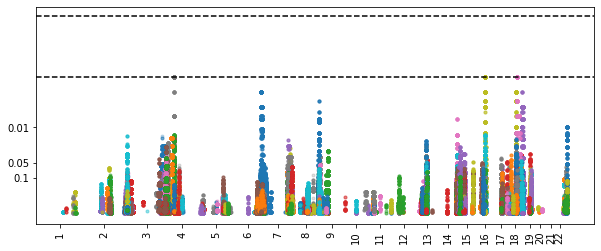

In [249]:
fig, subplots = plt.subplots(1, 1, figsize=(10, 4), sharey=True, sharex=True)

for i in range(len(combos)):
    indices = pvalues_comb[i, :]<0.5
    subplots.scatter(x[indices], np.clip(0, -np.log10(pvalues_comb[i, indices]), 3), marker='.', alpha=0.25)
        
  
plt.xticks([chrom_to_offset[x] for x in range(1, 23)], [str(x) for x in range(1, 23)], rotation=90)
plt.yticks(-np.log10([0.1, 0.05, 0.01]), ['0.1', '0.05', '0.01'])
plt.axhline(-np.log10(0.05/780), color='black', linestyle='--')
plt.axhline(-np.log10(1/1000), color='black', linestyle='--')
plt.show()

In [236]:
with open('../../PhenotypeGLRM/preprocessing/schemas/SCQ.json', 'r') as f:
    scq = json.load(f)

In [257]:
for i, (j, k) in enumerate(combos):
    if np.any(pvalues_comb[i, :] < 0.002):
        print(j, k, np.unique(chroms[pvalues_comb[i, :] < 0.01]))
        print(scq['properties']['Q%s' % str(j+1).zfill(2)]['description'])
        print(scq['properties']['Q%s' % str(k+1).zfill(2)]['description'])
    

1 30 [3]
Can have to and fro conversation
Tries to comfort you if you are sad or hurt
4 31 [18]
Gets pronous mixed up
Gestures with sound or words if she/he wants something
9 23 [16]
Uses your hand like a tool
Nods head to indicate yes


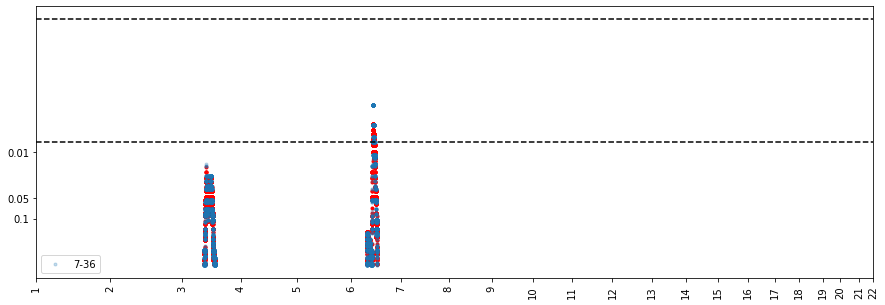

In [254]:
#phen_indices = [1, 30, 18]
phen_indices = [7, 36]

pvalues_multi = np.load('../permutation_tests/multicombinations/scq%s.%s.npy' % ('.'.join([str(x+1) for x in phen_indices]), dataset))

plt.figure(figsize=(15, 5))
indices = pvalues_multi<0.5
plt.scatter(x[indices], np.clip(0, -np.log10(pvalues_multi[indices]), 3), marker='.', color='red')


for i, (j, k) in enumerate(combos):
    if j in phen_indices and k in phen_indices:
        indices = pvalues_comb[i, :]<0.5
        plt.scatter(x[indices], np.clip(0, -np.log10(pvalues_comb[i, indices]), 3), marker='.', alpha=0.25, label='%d-%d' % (j, k))

        
plt.xticks([chrom_to_offset[x] for x in range(1, 23)], [str(x) for x in range(1, 23)], rotation=90)
plt.yticks(-np.log10([0.1, 0.05, 0.01]), ['0.1', '0.05', '0.01'])
plt.axhline(-np.log10(0.05/7), color='black', linestyle='--')
plt.axhline(-np.log10(1/10000), color='black', linestyle='--')
plt.legend()
plt.show()
